# In this notebook I will try nn for colorizing 1 picture and try to explain why it work 

Before trying this notebook you should run 'create_train_test_data.py' to create test/train data becurse i didn't push all images to git

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.path.abspath(os.curdir))))

Imports

In [2]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
from skimage.color import rgb2lab, lab2rgb 
import numpy as np
from PIL import Image
import os
from colorizer.moduls import paths
from colorizer.moduls.constants import *

In [3]:
img = Image.open(os.path.join(paths.TRAIN_DATA_PATH, 'resized_PXL_20201025_101503662.jpg'))

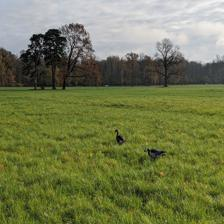

In [4]:
img

In [5]:
def prepare_img(image):
    image = img_to_array(image)
    image = np.array(image, dtype=float)
    return image

In [6]:
def prepare_x(image):
    X = rgb2lab(image/RGB_24)[:,:,0]
    X = X.reshape(1, WIDTH, HEIGHT, 1)
    return X

In [7]:
def prepare_y(image):
    Y = rgb2lab(image/RGB_24)[:, :, 1:]
    Y /= 128
    Y = Y.reshape(1, WIDTH, HEIGHT, 2)
    return Y

In [8]:
img = prepare_img(img)
X = prepare_x(img)
Y = prepare_y(img)

In [9]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(WIDTH, HEIGHT, 1)))
model.add(Conv2D(8, WINDOW, activation='relu', padding='same', strides=2))
model.add(Conv2D(8, WINDOW, activation='relu', padding='same'))
model.add(Conv2D(16, WINDOW, activation='relu', padding='same'))
model.add(Conv2D(16, WINDOW, activation='relu', padding='same', strides=2))
model.add(Conv2D(32, WINDOW, activation='relu', padding='same'))
model.add(Conv2D(32, WINDOW, activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, WINDOW, activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, WINDOW, activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, WINDOW, activation='tanh', padding='same'))

In [10]:
# Finish model
model.compile(optimizer='rmsprop',
			loss='mse')

In [11]:
model.fit(x=X, 
	y=Y,
	batch_size=1,
	epochs=1000)

Epoch 1/1000
1/1 [==============================] - 12s 12s/step - loss: 0.4281
Epoch 2/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.3659
Epoch 3/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.1020
Epoch 4/1000
1/1 [==============================] - 0s 22ms/step - loss: 0.0225
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0185
Epoch 6/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0173
Epoch 7/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0169
Epoch 8/1000
1/1 [==============================] - 0s 24ms/step - loss: 0.0169
Epoch 9/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0154
Epoch 10/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.0148
Epoch 11/1000
1/1 [==============================] - 0s 20ms/step - loss: 0.0146
Epoch 12/1000
1/1 [==============================] - 0s 21ms/step - loss: 0.0156
Epoch 13/1000
1/1 [==================

In [12]:
print(model.evaluate(X, Y, batch_size=1))

1/1 [==============================] - 0s 219ms/step - loss: 9.8792e-05
9.879188291961327e-05


In [13]:
# resized_image

In [15]:
img2 = Image.open(os.path.join(paths.TRAIN_DATA_PATH, 'resized_PXL_20201025_102120572.jpg'))
img2 = prepare_img(img2)
X2 = prepare_x(img2)

In [16]:
def show_predict(X):
    output = model.predict(X)
    output *= LAB_SPEC
    cur = np.zeros((WIDTH, HEIGHT, 3))
    cur[:, :, 0] = X[0][:, :, 0]
    cur[:, :, 1:] = output[0]
    return Image.fromarray((lab2rgb(cur)*RGB_24).astype(np.uint8))


d:\master\.venv\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: Color data out of range: Z < 0 in 65 pixels
  return func(*args, **kwargs)


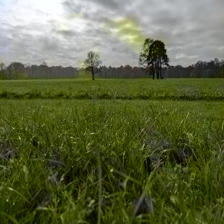

In [17]:
show_predict(X2)